In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#Carga de datos
data = pd.read_csv("Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,0.000932
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,0.000948
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175,0.000841
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,0.000674
4,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752,0.001343


In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [6]:
data['Customer_Segment'] 

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [7]:
data.head(7)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1


In [8]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [9]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [10]:
data['Alcohol'] = data['Alcohol'].fillna(0).astype(np.int64)
data['Malic_Acid'] = data['Malic_Acid'].fillna(0).astype(np.int64)
data['Ash'] = data['Ash'].fillna(0).astype(np.int64)
data['Ash_Alcanity'] = data['Ash_Alcanity'].fillna(0).astype(np.int64)
data['Total_Phenols'] = data['Total_Phenols'].fillna(0).astype(np.int64)
data['Flavanoids'] = data['Flavanoids'].fillna(0).astype(np.int64)
data['Nonflavanoid_Phenols'] = data['Nonflavanoid_Phenols'].fillna(0).astype(np.int64)
data['Proanthocyanins'] = data['Proanthocyanins'].fillna(0).astype(np.int64)
data['Color_Intensity'] = data['Color_Intensity'].fillna(0).astype(np.int64)
data['Hue'] = data['Hue'].fillna(0).astype(np.int64)
data['OD280'] = data['OD280'].fillna(0).astype(np.int64)

Transformamos la columnas float64 a int64, asi utilizar .loc mas adelante.

In [11]:
data.dtypes

Alcohol                 int64
Malic_Acid              int64
Ash                     int64
Ash_Alcanity            int64
Magnesium               int64
Total_Phenols           int64
Flavanoids              int64
Nonflavanoid_Phenols    int64
Proanthocyanins         int64
Color_Intensity         int64
Hue                     int64
OD280                   int64
Proline                 int64
Customer_Segment        int64
dtype: object

In [12]:
'Alcohol','Melic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline','Customer_Segment'

('Alcohol',
 'Melic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline',
 'Customer_Segment')

Seleccionamos unas muestra para luego verificar en que cluster se encuentran.

Escalamos los datos

In [19]:
indices = [21, 64, 132]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)

In [20]:
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

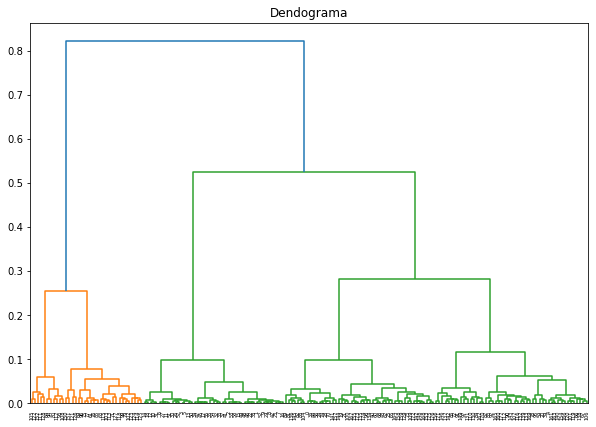

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendograma")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

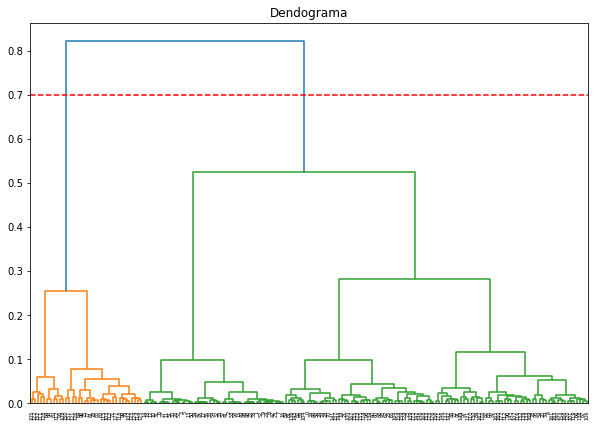

In [24]:
plt.figure(figsize=(10, 7))  
plt.title("Dendograma")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.7, color='r', linestyle='--')

Sabemos que existen 3 clasificaciones de clientes, por lo cual el dendrograma se observa que sebe utilizar un K=2, esto debido al corte realizado a la altura correspondiente para dividir los datos en dos grupos de datos. 

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

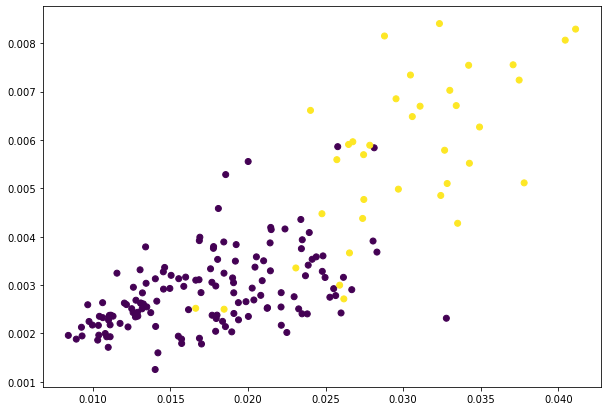

In [26]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Alcohol'], data_scaled['Total_Phenols'], c=cluster.labels_) 

In [28]:
indices = [11, 120]
muestras = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

In [29]:
#Se determina las variables a evaluar
X = data_escalada

In [30]:
# Obtenido el número de clúster se procede a definir los clústeres 
from sklearn.cluster import AgglomerativeClustering

In [31]:
# Se define el algoritmo junto con el valor de K
algoritmo = AgglomerativeClustering(n_clusters = 2 , affinity='euclidean', linkage='ward')

In [32]:
# Se entrena el algoritmo
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)

In [33]:
# Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)
for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 0


Podemos observar que utilizando dendograma, la cantidad de Cluster disminuye a 2, esto implica que de igual manera el agrupamiento de datos se genera solo en dos grandes grupos, estos dos grupos no se observa una division muy notoria como utilizando K-means, las columnas en el grafico anterior utilizado son 'Alcohol' y 'Color_Intensity', para mantener los mismos datos comparativos del ejercicio 1.

Nuestro corte sera en 0.7 asi de esa forma, tener una cantidad total de 2 cluster, lo que se vera afectado en el agrupaminetos de datos generando solo dos grandes grupos, en estos grupos no se ve una division tan explicita.
Reafirmando las comparativas para mantener los mismos datos a comparar el grafico nos hace ver una idea mas clara, que las anomalias existentes son muy minimas